In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Criar dados simulados binários com 2 variáveis informativas
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

In [ ]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Treinar o modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Fazer previsões
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1

In [ ]:
# Classification report
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred))

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       148
           1       0.90      0.85      0.87       152

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [ ]:
'''
Classe 0:

precision = 0.85 → o modelo acertou 85% das vezes que previu classe 0

recall = 0.90 → o modelo acertou 90% dos exemplos reais de classe 0

Classe 1:

precision = 0.90 → entre as previsões de classe 1, 90% estavam corretas

recall = 0.85 → o modelo acertou 85% dos exemplos reais de classe 1

A linha accuracy mostra o percentual total de acertos: 0.87 → 87% de acerto
geral.

total real da classe 0 148 (support) (total da liha 0 matriz de confusão)
total real da classe 1 152 (support) (total da liha 0 matriz de confusão)
total previsto da classe 0 156 (total da coluna 0)
total previsto da coluna 1 144 (total da coluna 1)

tota1 de previsões certas na classe 0 (133)
totla de previsões certas na classe 1 (129)

precision: total de previsões certas/total de previsões da classe (soma da coluna)
recall: tototal de previsões certas/ total real da classe

precision 0: 133 / 156 = 0.85
precision 1: 129 / 144 = 0.9
recall 0: 133 / 148 = 0.9
recall 1: 129 / 152 = 0.85

'''

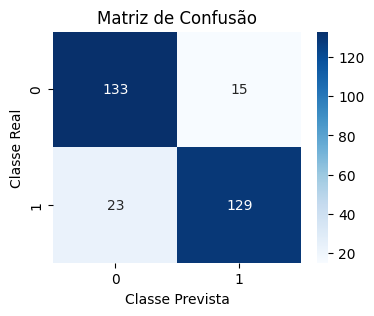

In [ ]:
# Matriz de Confusão
plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

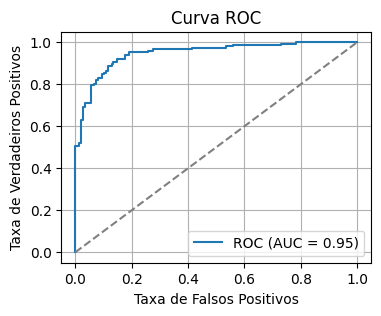

In [ ]:
# Curva ROC
plt.figure(figsize=(4, 3))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''
Curva ROC
Essa curva azul mostra o desempenho do modelo em diferentes níveis de confiança.

O eixo X mostra a Taxa de Falsos Positivos → quando o modelo erra prevendo "1"
quando era "0"

O eixo Y mostra a Taxa de Verdadeiros Positivos → acertos quando o valor real e
ra "1"

A linha pontilhada cinza é o "chute aleatório" — se o modelo não soubesse nada,
ele seguiria essa linha.

O que é o AUC?
AUC = Área Sob a Curva

No seu caso: AUC = 0.95, o que significa que o modelo tem excelente capacidade
de separar as classes (quanto mais perto de 1, melhor).

Você treinou um modelo com dados balanceados, e ele:

Teve 87% de acerto geral

Foi bom nas duas classes (precision e recall próximas)

Teve poucos erros (matriz de confusão com valores baixos fora da diagonal)

Obteve um ótimo desempenho na curva ROC com AUC = 0.95

Isso indica que o modelo está muito bem treinado e faz boas previsões mesmo em
dados que ele nunca viu.

'''

# Modelo desbalanceado


Avaliação do modelo:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       268
           1       0.86      0.56      0.68        32

    accuracy                           0.94       300
   macro avg       0.90      0.78      0.82       300
weighted avg       0.94      0.94      0.94       300



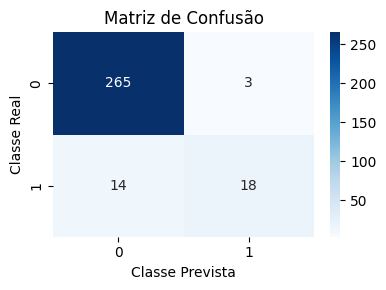

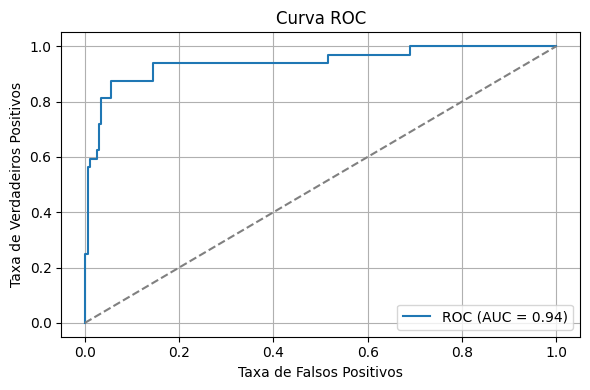

AUC final do modelo desbalanceado: 0.9403


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Criar dados desbalanceados
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, weights=[0.9, 0.1],
                           random_state=42)

# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo com class_weight='balanced'
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Prever
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Avaliação
print("\nAvaliação do modelo:\n")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Exibir AUC
print(f"AUC final do modelo desbalanceado: {roc_auc:.4f}")

In [ ]:
'''
Interpretação do que é positivo e o que é negativo:

0: Negativo
1: Positivo

Verdadeiro negativo (VN): 265 previsto negativo (0) e real negativo (0)

Falso negativo (FN): 14 previsto negativo (0) e real positivo (1)

Verdadeiro positivo (VP): 18 previsto positivo (1) e real positivo (1)

Falso positivo (FP): 3 previsto positivo (1) e real negativo (0)

'''


Avaliação do modelo com class_weight='balanced'

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       268
           1       0.47      0.88      0.61        32

    accuracy                           0.88       300
   macro avg       0.72      0.88      0.77       300
weighted avg       0.93      0.88      0.89       300



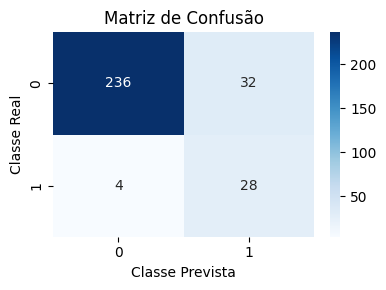

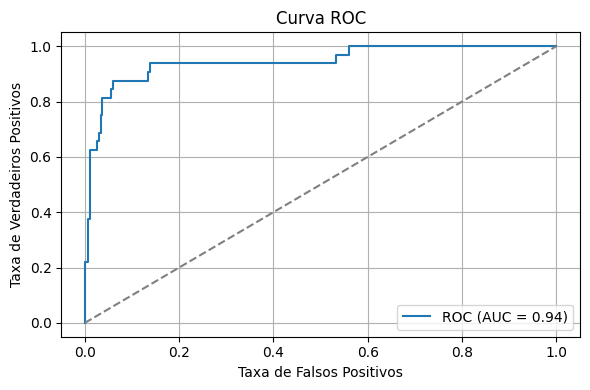

AUC final do modelo com class_weight='balanced': 0.9436


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Criar dados desbalanceados
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, weights=[0.9, 0.1],
                           random_state=42)

# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo com class_weight='balanced'
modelo = LogisticRegression(class_weight='balanced')
modelo.fit(X_train, y_train)

# Prever
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Avaliação
print("\nAvaliação do modelo com class_weight='balanced'\n")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Exibir AUC
print(f"AUC final do modelo com class_weight='balanced': {roc_auc:.4f}")


# Usando o label encoder

In [ ]:
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSoXTu8PT2ChbkAGXPmWnE5aE_mOWqYAmMMxAbS6ZNQbxqo2G74H5_AaUn6tUVZUo6V1G4VTrkaN-Vc/pub?gid=960910883&single=true&output=csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   instagram  171 non-null    float64
 1   facebook   171 non-null    float64
 2   blog       171 non-null    float64
 3   lucro      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Calculate the median of 'lucro' column
median_lucro = df['lucro'].median()
median_lucro

15.48

In [ ]:
df['status'] = df['lucro'].apply(lambda lucro: 'acima' if lucro > median_lucro else 'não - acima')
df.head()

,instagram,facebook,blog,lucro,status
0,84.72,19.20,48.96,12.60,não - acima
1,351.48,33.96,51.84,25.68,acima
2,135.48,20.88,46.32,14.28,não - acima
3,116.64,1.80,36.00,11.52,não - acima
4,318.72,24.00,0.36,20.88,acima


In [ ]:
df = df.drop('lucro', axis=1)
display(df)

,instagram,facebook,blog,status
0,84.72,19.20,48.96,não - acima
1,351.48,33.96,51.84,acima
2,135.48,20.88,46.32,não - acima
3,116.64,1.80,36.00,não - acima
4,318.72,24.00,0.36,acima
...,...,...,...,...
166,45.84,4.44,16.56,não - acima
167,113.04,5.88,9.72,não - acima
168,212.40,11.16,7.68,não - acima
169,340.32,50.40,79.44,acima


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])

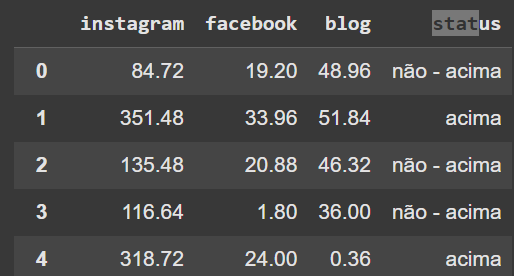

In [ ]:
df.head()

,instagram,facebook,blog,status
0,84.72,19.20,48.96,1
1,351.48,33.96,51.84,0
2,135.48,20.88,46.32,1
3,116.64,1.80,36.00,1
4,318.72,24.00,0.36,0
